# **Prediction Using Decision Tree Algorithm**

## 1. Importing all packages

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns
%matplotlib inline

## 2.  Importing and extracting data 

In [ ]:
df=pd.read_csv("Iris.csv",index_col=0)#removing index
print("Data Imported")
df.head()

Data Imported


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# Getting target and integer encoding 

y=pd.DataFrame(df.Species)
print(y.value_counts())

cleanup_nums = {"Species": {"Iris-virginica": 1, "Iris-versicolor": 2, "Iris-setosa":3,}}

y.replace(cleanup_nums, inplace=True)
y.head()

Species        
Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
dtype: int64


,Species
Id,
1,3
2,3
3,3
4,3
5,3


In [ ]:
#drop y column
df.drop(["Species"],axis=1,inplace=True)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,,,,
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2


## 3. Create a ml(decision tree model)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()
dt.fit(df,y)

print('Decision Tree Classifer Created')

Decision Tree Classifer Created


## 4. Visualizing dt model

In [ ]:
#library to visualize decision trees
!pip install pydotplus
!apt-get install graphviz -y

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
0 upgraded, 0 newly installed, 0 to remove and 6 not upgraded.


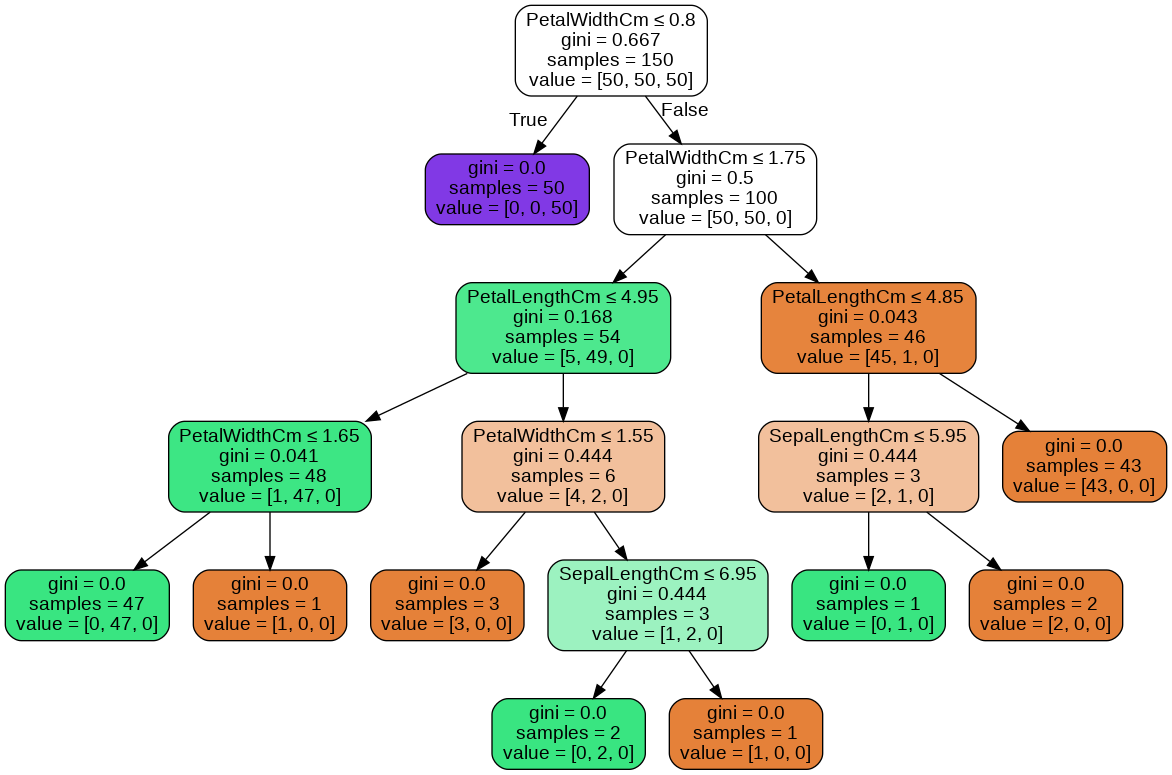

In [ ]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

# Visualize the graph
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data, feature_names=df.columns,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())